In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('star_classification.csv')
df.drop(columns=['obj_ID', 'rerun_ID'], inplace=True)

In [19]:
df.rename(columns={'alpha': 'ra', 'delta':'dec', 'run_ID':'run', 'cam_col':'camcol', 'field_ID':'field', 'spec_obj_ID': 'specobjid', 'MJD':'mjd', 'fiber_ID': 'fiberid'}, inplace=True)

In [21]:
col_list = list(df.columns)
del col_list[11]

In [22]:
data = df[col_list].to_numpy()
target = df['class'].to_numpy()

In [24]:
df.to_csv('predict_value.csv')

<AxesSubplot:>

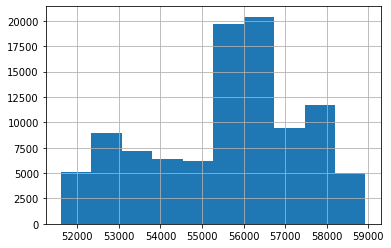

In [25]:
df['mjd'].hist()

<AxesSubplot:>

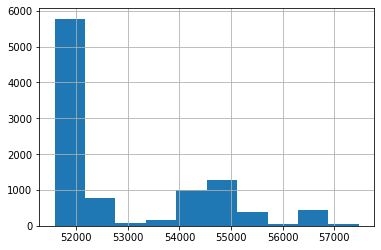

In [26]:
df2 = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39_PM.csv")
df2['mjd'].hist()

<AxesSubplot:>

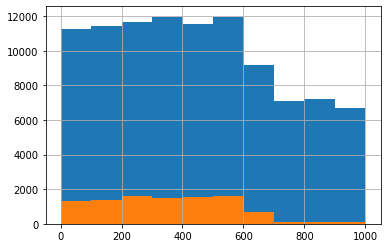

In [28]:
df['fiberid'].hist()
df2['fiberid'].hist()

In [ ]:
from scipy.stats import uniform, randint
param = {'max_depth':randint(3,50), 'num_leaves' : randint(30,100)}
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(LGBMClassifier(random_state=42), param, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_scaled, train_target)

In [ ]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))
print(gs.best_estimator_.score(predict_scaled, predict_target))